# MAT281 - Laboratorio N°06



## Problema 01
<img src="./images/logo_iris.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [92]:
# librerias
 
import os
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [93]:
# cargar datos
df = pd.read_csv(os.path.join("data","iris_contaminados.csv"))
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head() 

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [94]:
# correccion formato de specie 
# Dado que no todos los nombres están escritos de la misma forma se debe homogenizar.
df['species'] = df['species'].str.lower().str.strip()

# Revisión de valores nan
check_for_nan = df.isnull().values.any()
if check_for_nan ==True:
    print ('Existen valores Nan')
else:
    print('No hay valores Nan')

# Reemplazo de valores nan por 'default'
df= df.fillna('default')

# Revisión de valores nan
check_for_nan = df.isnull().values.any()
if check_for_nan ==True:
    print ('Existen valores Nan')
else:
    print('No hay valores Nan')

# Conteo de los elementos en la columna specie
freq = df.groupby(['species']).count() 
print(freq)

Existen valores Nan
No hay valores Nan
            sepalLength  sepalWidth  petalLength  petalWidth
species                                                     
default               1           1            1           1
setosa               50          50           50          50
versicolor           49          49           49          49
virginica            50          50           50          50


2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

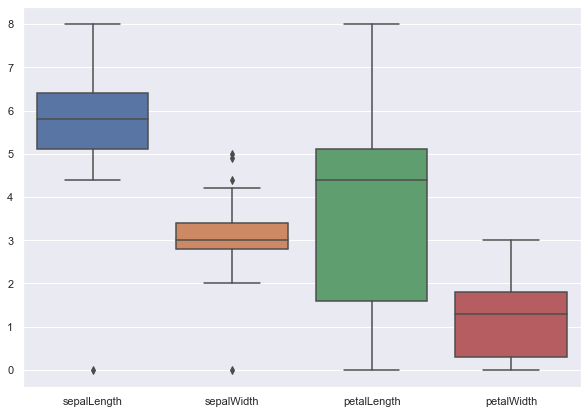

In [95]:
# Reemplazo de valores 'default' por 0
df= df.replace('default',0)

# Se le da un estilo al gráfico
sns.set(style="darkgrid")

# Se inicia la figura
fig = plt.figure(figsize =(10, 7))
 
# Se crea el gráfico
sns.boxplot(data=df)
 
# Se muestra el gráfico
plt.show()

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

### Considerando que se deben cumplir todas las condiciones al mismo tiempo

In [96]:
# creamos la lista con la condición que queremos cumplir
conditions = [
    (df['sepalLength'] >= 4) & (df['sepalLength'] <= 7) 
    & (df['sepalWidth'] >= 2) & (df['sepalWidth'] <= 4.5) 
    & (df['petalLength'] >= 1) & (df['petalLength'] <= 7) 
    & (df['petalWidth'] >= 0.1) & (df['petalWidth'] <= 2.5),
    (df['sepalLength'] < 4) | (df['sepalLength'] > 7) 
    | (df['sepalWidth'] < 2) | (df['sepalWidth'] > 4.5) 
    | (df['petalLength'] < 1) | (df['petalLength'] > 7) 
    | (df['petalWidth'] < 0.1) | (df['petalWidth'] > 2.5)
    ]

# creamos la lista con valores a asignar en caso de cumplirse la condición
values = ['Todo OK','Fuera de rango']

# se crea una nueva columna utilizando np.select para asignar valor usando listas como argumentos
df['label'] = np.select(conditions, values)

# Se muestran los datos
df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species,label
0,4.4,3.2,1.3,3.0,setosa,Fuera de rango
1,7.2,3.6,6.1,2.5,virginica,Fuera de rango
2,6.3,3.3,6.0,2.5,virginica,Todo OK
3,6.7,3.3,5.7,2.5,virginica,Todo OK
4,6.3,3.4,5.6,2.4,virginica,Todo OK


4. Realice un gráfico de *sepalLength* vs *petalLength* y otro de *sepalWidth* vs *petalWidth* categorizados por la etiqueta **label**. Concluya sus resultados.

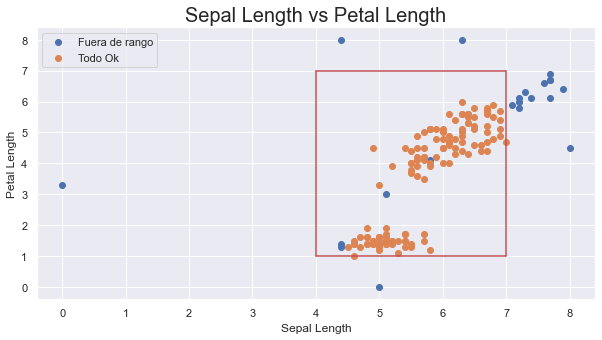

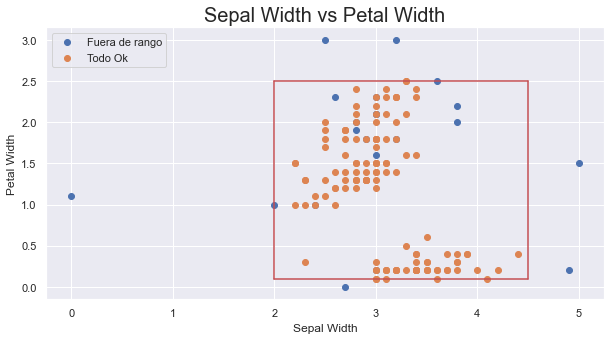

In [97]:
# Obtención de datos para sepalLength vs petalLength.
df_Fuera = df[df['label'] == 'Fuera de rango']
df_Ok = df[df['label'] == 'Todo OK']

y1 = df_Fuera[['petalLength']]
x1 = df_Fuera[['sepalLength']]

y2 = df_Ok[['petalLength']]
x2 = df_Ok[['sepalLength']]

fig = plt.figure(figsize=(10, 5)) # ventana
plt.plot([4,4],[1,7],'r')
plt.plot([7,7],[1,7],'r')
plt.plot([4,7],[1,1],'r')
plt.plot([4,7],[7,7],'r')
plt.scatter(x1,y1,label="Fuera de rango") # Se grafica el ajuste.
plt.scatter(x2,y2,label="Todo Ok") # Se grafica el ajuste.
plt.xlabel("Sepal Length") # Título eje x
plt.ylabel("Petal Length") # Título eje y
plt.legend(loc='upper left') # Ubicación de la leyenda
plt.title("Sepal Length vs Petal Length", size=20) # Título de la Figura y su tamaño
plt.show()


# Obtención de datos para sepalWidth vs petalWidth .
df_Fuera = df[df['label'] == 'Fuera de rango']
df_Ok = df[df['label'] == 'Todo OK']

y1 = df_Fuera[['petalWidth']]
x1 = df_Fuera[['sepalWidth']]

y2 = df_Ok[['petalWidth']]
x2 = df_Ok[['sepalWidth']]

fig = plt.figure(figsize=(10, 5)) # ventana
plt.plot([2,2],[0.1,2.5],'r')
plt.plot([4.5,4.5],[0.1,2.5],'r')
plt.plot([2,4.5],[0.1,0.1],'r')
plt.plot([2,4.5],[2.5,2.5],'r')
plt.scatter(x1,y1,label="Fuera de rango") # Se grafica el ajuste.
plt.scatter(x2,y2,label="Todo Ok") # Se grafica el ajuste.
plt.xlabel("Sepal Width") # Título eje x
plt.ylabel("Petal Width") # Título eje y
plt.legend(loc='upper left') # Ubicación de la leyenda
plt.title("Sepal Width vs Petal Width", size=20) # Título de la Figura y su tamaño
plt.show()

- Dado que se considero que todas las condiciones se deben cumplir al mismo tiempo se tienen valores con el label 'Fuera de rango' al interior de recuadro válido para sepalLength vs petalLength y sepalWidth vs petalWidth

### Consideremos ahora las condiciones de sepalLength y petalLength en conjunto, pero separada de las condiciones de sepalWidth y petalWidth

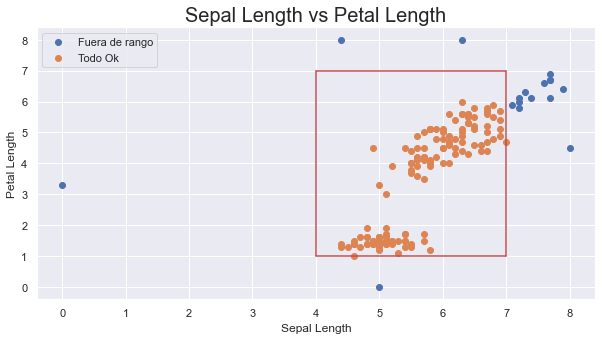

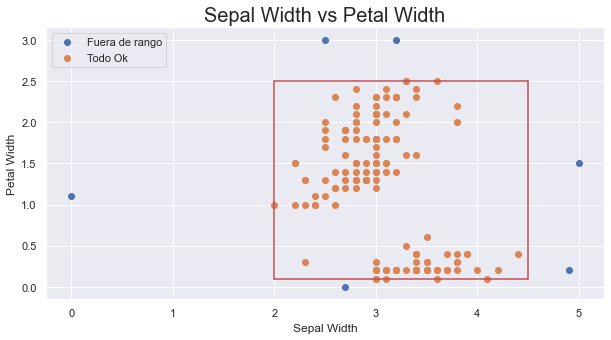

In [98]:
# creamos la lista con la condición que queremos cumplir
conditions = [
    (df['sepalLength'] >= 4) & (df['sepalLength'] <= 7) 
    & (df['petalLength'] >= 1) & (df['petalLength'] <= 7) ,
    (df['sepalLength'] < 4) | (df['sepalLength'] > 7)    
    | (df['petalLength'] < 1) | (df['petalLength'] > 7) 
    ]

# creamos la lista con valores a asignar en caso de cumplirse la condición
values = ['Todo OK','Fuera de rango']

# se crea una nueva columna utilizando np.select para asignar valor usando listas como argumentos
df['label 2'] = np.select(conditions, values)

# Obtención de datos para sepalLength vs petalLength.
df_Fuera = df[df['label 2'] == 'Fuera de rango']
df_Ok = df[df['label 2'] == 'Todo OK']

y1 = df_Fuera[['petalLength']]
x1 = df_Fuera[['sepalLength']]

y2 = df_Ok[['petalLength']]
x2 = df_Ok[['sepalLength']]

fig = plt.figure(figsize=(10, 5)) # ventana
plt.plot([4,4],[1,7],'r')
plt.plot([7,7],[1,7],'r')
plt.plot([4,7],[1,1],'r')
plt.plot([4,7],[7,7],'r')
plt.scatter(x1,y1,label="Fuera de rango") # Se grafica el ajuste.
plt.scatter(x2,y2,label="Todo Ok") # Se grafica el ajuste.
plt.xlabel("Sepal Length") # Título eje x
plt.ylabel("Petal Length") # Título eje y
plt.legend(loc='upper left') # Ubicación de la leyenda
plt.title("Sepal Length vs Petal Length", size=20) # Título de la Figura y su tamaño
plt.show()


# creamos la lista con la condición que queremos cumplir
conditions = [
    (df['sepalWidth'] >= 2) & (df['sepalWidth'] <= 4.5) 
    & (df['petalWidth'] >= 0.1) & (df['petalWidth'] <= 2.5),
    (df['sepalWidth'] < 2) | (df['sepalWidth'] > 4.5) 
    | (df['petalWidth'] < 0.1) | (df['petalWidth'] > 2.5)
    ]

# creamos la lista con valores a asignar en caso de cumplirse la condición
values = ['Todo OK','Fuera de rango']

# se crea una nueva columna utilizando np.select para asignar valor usando listas como argumentos
df['label 3'] = np.select(conditions, values)

# Obtención de datos para sepalWidth vs petalWidth .
df_Fuera = df[df['label 3'] == 'Fuera de rango']
df_Ok = df[df['label 3'] == 'Todo OK']

y1 = df_Fuera[['petalWidth']]
x1 = df_Fuera[['sepalWidth']]

y2 = df_Ok[['petalWidth']]
x2 = df_Ok[['sepalWidth']]

fig = plt.figure(figsize=(10, 5)) # ventana
plt.plot([2,2],[0.1,2.5],'r')
plt.plot([4.5,4.5],[0.1,2.5],'r')
plt.plot([2,4.5],[0.1,0.1],'r')
plt.plot([2,4.5],[2.5,2.5],'r')
plt.scatter(x1,y1,label="Fuera de rango") # Se grafica el ajuste.
plt.scatter(x2,y2,label="Todo Ok") # Se grafica el ajuste.
plt.xlabel("Sepal Width") # Título eje x
plt.ylabel("Petal Width") # Título eje y
plt.legend(loc='upper left') # Ubicación de la leyenda
plt.title("Sepal Width vs Petal Width", size=20) # Título de la Figura y su tamaño
plt.show()

- En esta ocasión podemos apreciar que todos los valores que cumplen se encuentran al interior del recuadro.

5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

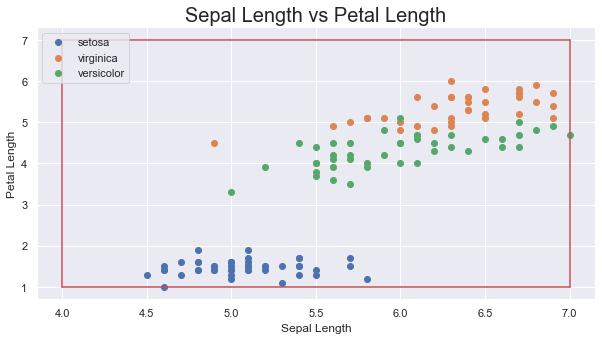

In [99]:
# Obtención de datos para sepalLength vs petalLength.
Variedades = list(df['species'].unique())

# Trabajaremos con el data frame que considera que todas las condiciones fueron cumplidas
df_Ok = df[df['label'] == 'Todo OK']

# En este caso se dejara fuera la fila de la variedad que contenia valores nan
df_1 = df_Ok[df_Ok['species'] == Variedades[0]]
df_2 = df_Ok[df_Ok['species'] == Variedades[1]]
df_3 = df_Ok[df_Ok['species'] == Variedades[2]]


fig = plt.figure(figsize=(10, 5)) # ventana
plt.plot([4,4],[1,7],'r')
plt.plot([7,7],[1,7],'r')
plt.plot([4,7],[1,1],'r')
plt.plot([4,7],[7,7],'r')
plt.scatter(df_1[['sepalLength']],df_1[['petalLength']],label=Variedades[0]) # Se grafica el ajuste.
plt.scatter(df_2[['sepalLength']],df_2[['petalLength']],label=Variedades[1]) # Se grafica el ajuste.
plt.scatter(df_3[['sepalLength']],df_3[['petalLength']],label=Variedades[2]) # Se grafica el ajuste.
plt.xlabel("Sepal Length") # Título eje x
plt.ylabel("Petal Length") # Título eje y
plt.legend(loc='upper left') # Ubicación de la leyenda
plt.title("Sepal Length vs Petal Length", size=20) # Título de la Figura y su tamaño
plt.show()

- En esta ocasión podemos apreciar que no hay valores fuera del rango válido dado que todas las condiciones deben cumplirse al mismo tiempo y solo se está trabajando con el rango de valores Ok.